In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# liens ver kaggles : https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data/data

In [25]:
df = pd.read_csv('personality_dataset.csv')

In [26]:
df.describe(include='all')

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2837.000000,2827,2838.000000,2834.000000,2848,2823.000000,2835.000000,2900
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,1417,NaN,NaN,1441,NaN,NaN,1491
mean,4.505816,NaN,3.963354,3.000000,NaN,6.268863,3.564727,NaN
std,3.479192,NaN,2.903827,2.247327,NaN,4.289693,2.926582,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,2.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,NaN
50%,4.000000,NaN,3.000000,3.000000,NaN,5.000000,3.000000,NaN
75%,8.000000,NaN,6.000000,5.000000,NaN,10.000000,6.000000,NaN


In [27]:
df.isnull().sum()


Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [28]:
df_mask = df.isnull().any(axis=1)
df_null = df[df_mask]
df_null

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
33,8.0,Yes,3.0,3.0,NaN,2.0,0.0,Introvert
41,1.0,No,4.0,5.0,No,NaN,10.0,Extrovert
59,NaN,No,9.0,4.0,No,7.0,5.0,Extrovert
71,1.0,No,NaN,5.0,No,11.0,8.0,Extrovert
...,...,...,...,...,...,...,...,...
2882,1.0,NaN,9.0,3.0,No,7.0,6.0,Extrovert
2885,10.0,Yes,0.0,0.0,NaN,2.0,0.0,Introvert
2893,9.0,NaN,2.0,0.0,Yes,4.0,2.0,Introvert
2894,0.0,No,9.0,3.0,No,12.0,NaN,Extrovert


In [ ]:
cols_numeriques = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                   'Friends_circle_size', 'Post_frequency']

for col in cols_numeriques:
    df[col].fillna(df[col].mean(), inplace=True)


In [30]:
df_cleaned = df.dropna(subset=['Stage_fear', 'Drained_after_socializing'])


In [31]:
df_cleaned.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

Pour les valeurs numériques, nous remplaçons les NaN par la moyenne de chaque colonne, car nous avons vérifié qu’il n’y a pas d’outliers, ce qui rend cette méthode fiable.
Pour les colonnes catégorielles, nous supprimons simplement les lignes contenant des NaN afin de ne pas risquer d’altérer un éventuel pattern lié aux individus. Cette suppression représente une perte de 2,8 % du dataset.

In [41]:
df_cleaned.duplicated().sum()

np.int64(391)

On garde les doublons, car plusieurs individus peuvent avoir les mêmes caractéristiques.

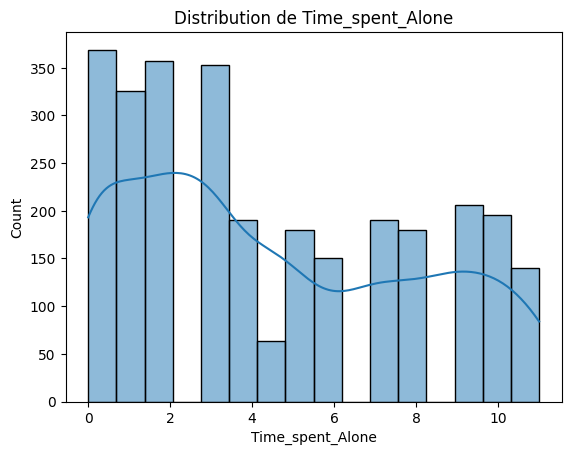

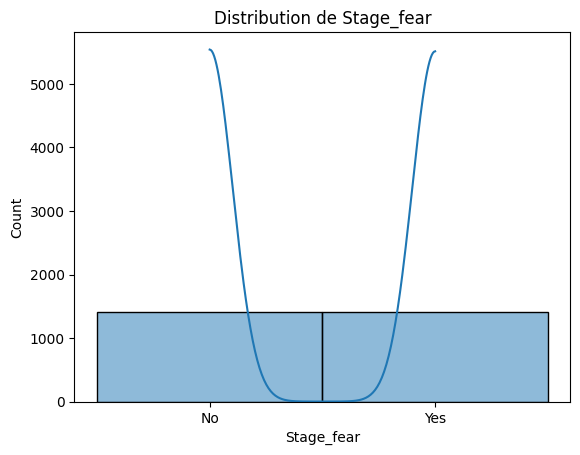

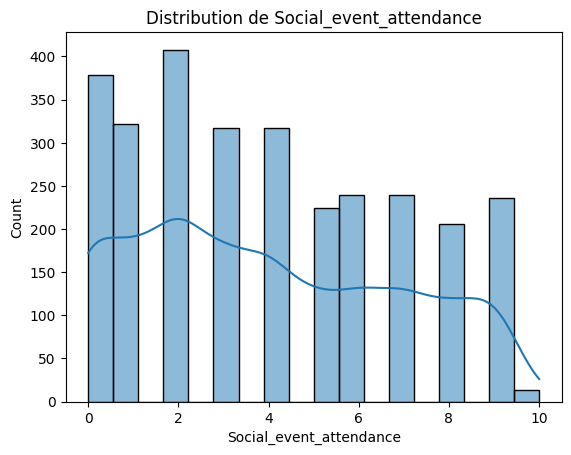

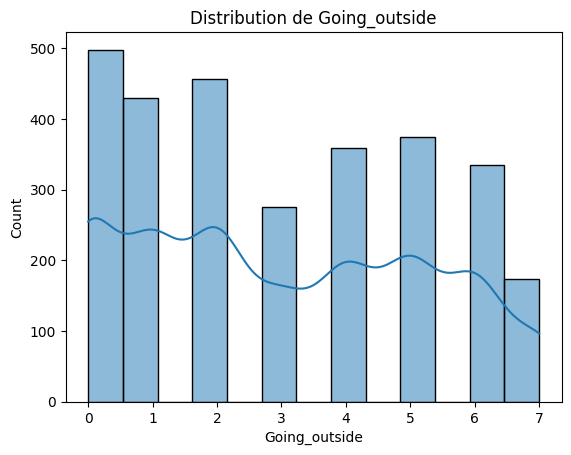

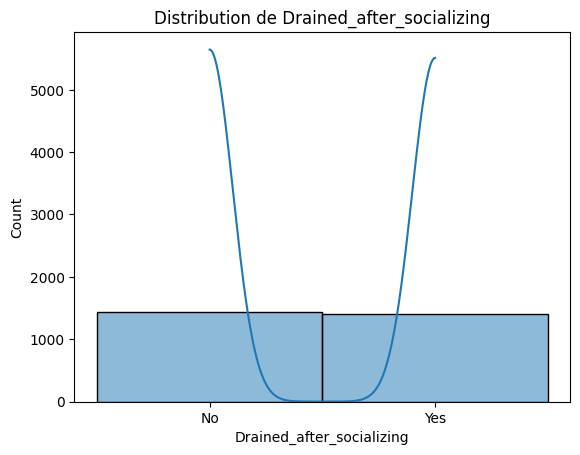

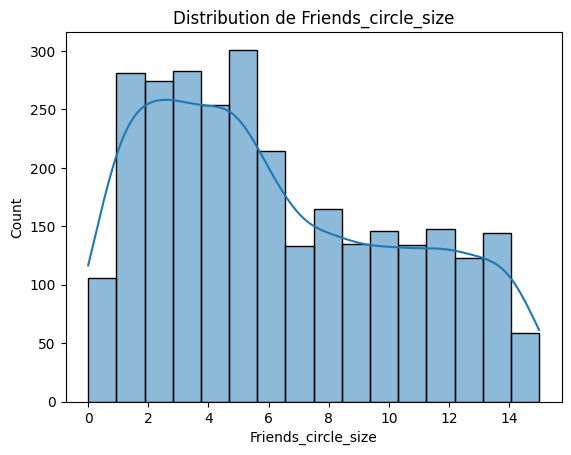

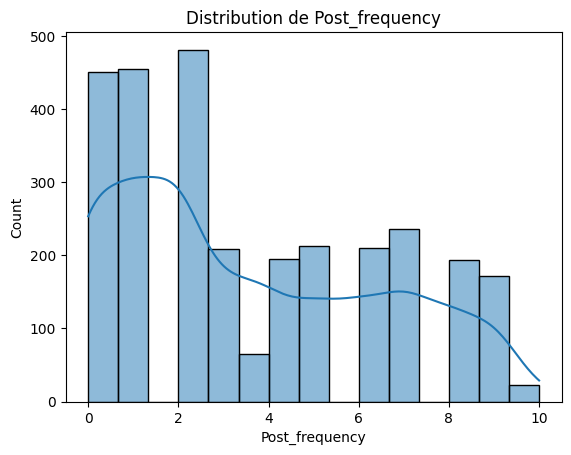

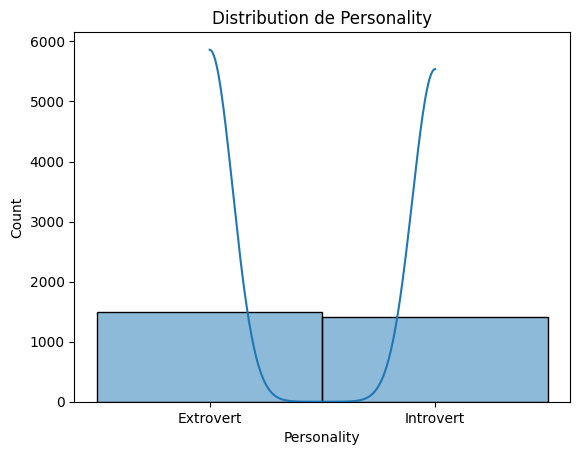

In [45]:

for col in df_cleaned.columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()

**Analyse des distributions par colonnes :**

Temps passé seul :
On observe que la majorité des personnes passent entre 0 et 3 heures seules par jour. Au-delà de 3 heures, le nombre de personnes diminue d’environ une moitié.

Stage fear :
Variable catégorielle avec une répartition équilibrée entre les modalités (Yes/No), ce qui correspond à une distribution presque parfaite.

Participation à des événements sociaux :
On remarque une tendance descendante : la majorité des personnes participent à entre 1 et 4 événements sociaux, puis ce nombre décroît progressivement jusqu’à 9, avant de chuter drastiquement à 10.

Sorties dehors :
La distribution présente une tendance générale à la baisse avec une baisse notable à 3 sorties (environ divisée par deux). Ensuite, on observe une légère remontée entre 4 et 6 sorties, suivie d’une nouvelle baisse à 7.
On note également qu’un nombre significatif de personnes ne sortent pas du tout, tandis qu’un autre groupe sort une à deux fois par jour.

Feeling drained after socializing :
La distribution est presque équilibrée, avec une répartition quasi parfaite entre les réponses.

Taille du cercle d’amis :
La distribution ressemble à une courbe normale avec un pic entre 2 et 4 amis, indiquant que la majorité des individus ont un cercle d’amis restreint.

Publication sur les réseaux sociaux :
On observe que globalement, les personnes postent peu, la majorité publiant entre 0 et 2 fois.

Personnalité :
La distribution des catégories Extrovert/Introvert est presque équilibrée, indiquant une répartition homogène dans le dataset.



In [46]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2776 non-null   float64
 1   Stage_fear                 2776 non-null   object 
 2   Social_event_attendance    2776 non-null   float64
 3   Going_outside              2776 non-null   float64
 4   Drained_after_socializing  2776 non-null   object 
 5   Friends_circle_size        2776 non-null   float64
 6   Post_frequency             2776 non-null   float64
 7   Personality                2776 non-null   object 
dtypes: float64(5), object(3)
memory usage: 195.2+ KB


In [48]:
df_cleaned[df_cleaned.select_dtypes(include='object').columns] = df_cleaned.select_dtypes(include='object').apply(lambda x: x.astype('category'))


C:\Users\best baguette\AppData\Local\Temp\ipykernel_4868\3434428286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[df_cleaned.select_dtypes(include='object').columns] = df_cleaned.select_dtypes(include='object').apply(lambda x: x.astype('category'))


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Time_spent_Alone           2776 non-null   float64 
 1   Stage_fear                 2776 non-null   category
 2   Social_event_attendance    2776 non-null   float64 
 3   Going_outside              2776 non-null   float64 
 4   Drained_after_socializing  2776 non-null   category
 5   Friends_circle_size        2776 non-null   float64 
 6   Post_frequency             2776 non-null   float64 
 7   Personality                2776 non-null   category
dtypes: category(3), float64(5)
memory usage: 138.6 KB


On modifie les types object en category afin de gagner de la mémoire et de faciliter les opérations pendant l’entraînement des modèles.

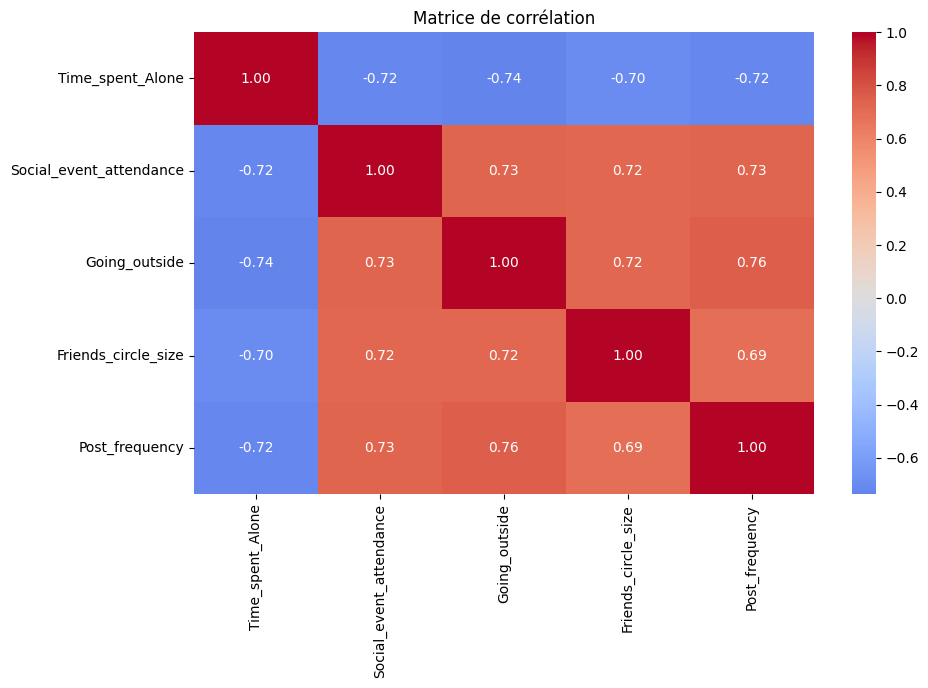

In [50]:
corr_matrice = df_cleaned.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrice, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matrice de corrélation")
plt.show()

Sur cette matrice de corrélation, on distingue clairement deux groupes :

Le premier groupe regroupe les personnes qui passent le plus de temps seules. Celles-ci ont tendance à poster moins sur les réseaux sociaux, à avoir un cercle d’amis plus restreint, à sortir moins souvent et à participer à moins d’événements sociaux.
La corrélation la plus forte dans ce groupe est négative (-0,74) et concerne la fréquence de sortie : plus ces individus passent de temps seuls, moins ils sortent.

Le deuxième groupe correspond à ceux qui sortent plus fréquemment. Ils ont tendance à poster davantage sur les réseaux sociaux, à participer à plus d’événements sociaux et à avoir un cercle d’amis plus large.
La corrélation la plus forte dans ce groupe est positive (0,76) et concerne la fréquence de publication sur les réseaux sociaux : sortir plus est associé à poster plus.